In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [2]:

water = glob.glob("data/water/*.jpg")
green = glob.glob("data/green_area/*.jpg")
desert = glob.glob("data/desert/*.jpg")
cloudy = glob.glob("data/cloudy/*.jpg")


In [5]:

image = []
label = []
for i in water:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in green:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

for i in desert:
    img = plt.imread(i)
    image.append(img)
    label.append(2)
   
for i in cloudy:
    img = plt.imread(i)
    image.append(img)
    label.append(3)

In [7]:
from sklearn.utils import shuffle
image,label = shuffle(image,label,random_state=100)


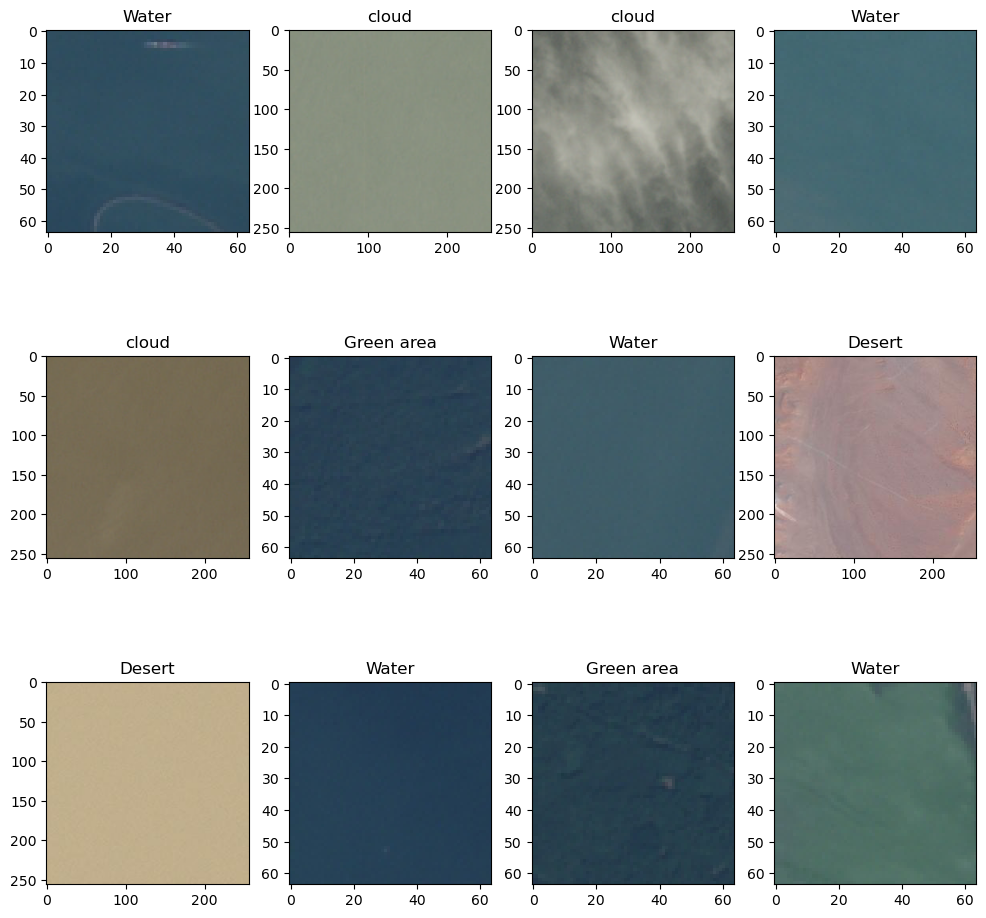

In [9]:
plt.figure(figsize=(12,12))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    if label[i]==0:
        plt.title('Water')
    elif label[i]==1:
        plt.title('Green area')
    elif label[i]==2:
        plt.title('Desert')
    elif label[i]==3:
        plt.title('cloud')

In [11]:
from skimage.transform import resize

X=[]
for i in image:
    X.append(resize(i,(64,64,3)))
X= np.array(X)


In [12]:
y=np.array(label)

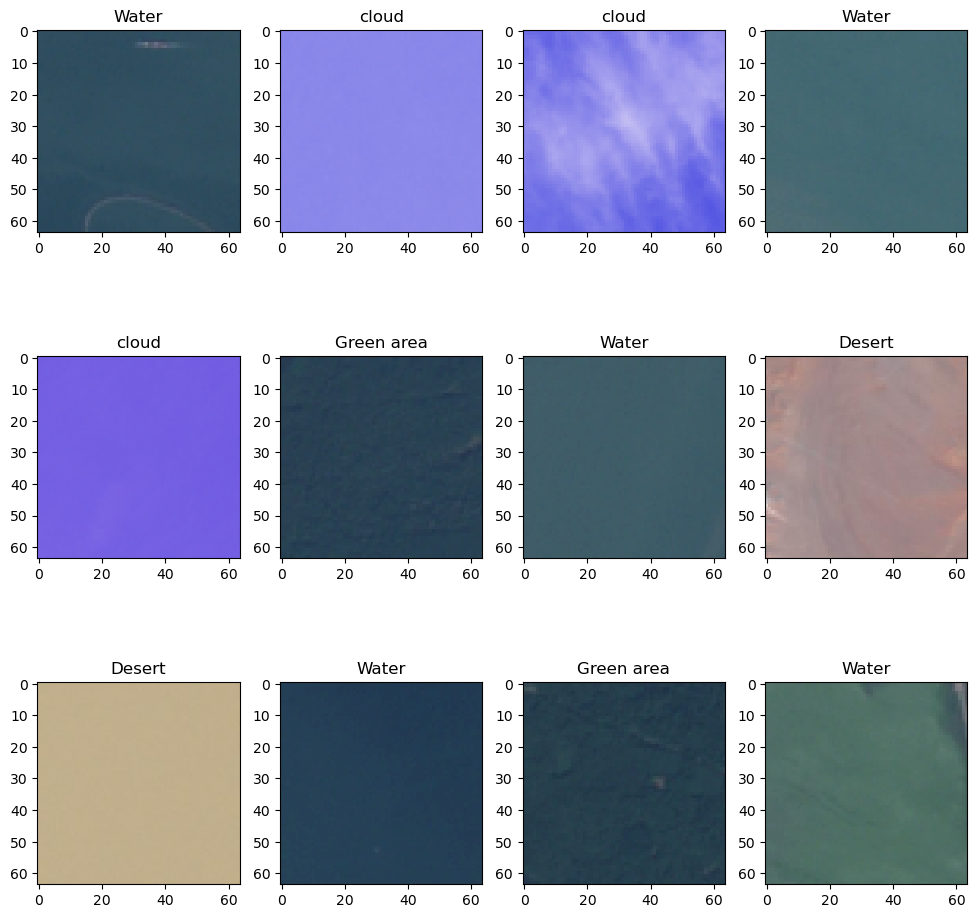

In [13]:
plt.figure(figsize=(12,12))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X[i])
    if y[i]==0:
        plt.title('Water')
    elif y[i]==1:
        plt.title('Green area')
    elif y[i]==2:
        plt.title('Desert')
    elif y[i]==3:
        plt.title('cloud')

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Input,Conv2D,MaxPool2D

model=Sequential([
    Input(shape=(64,64,3)),
    Conv2D(16,(3,3),activation='relu'),
    MaxPool2D(2,2),
    Conv2D(32,(3,3),activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(4,activation='softmax')
    
])

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(X_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.6611 - loss: 0.7365 - val_accuracy: 0.9190 - val_loss: 0.2445
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9059 - loss: 0.2146 - val_accuracy: 0.9342 - val_loss: 0.1584
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 15s 140ms/step - accuracy: 0.8970 - loss: 0.2333 - val_accuracy: 0.8962 - val_loss: 0.1855
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9206 - loss: 0.1760 - val_accuracy: 0.9291 - val_loss: 0.1549
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step - accuracy: 0.9199 - loss: 0.1696 - val_accuracy: 0.9190 - val_loss: 0.1804
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 16s 137ms/step - accuracy: 0.9240 - loss: 0.1628 - val_accuracy: 0.9418 - val_loss: 0.1258
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 15s 137ms/step - accuracy: 0.9358 - loss: 0.1386 - val_accuracy: 0.9519 - val_loss: 0.1219
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9444 - loss: 0.1321 -

In [24]:
y_pred=model.predict(X_test)

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [25]:
y_pred=[np.argmax(i) for i in y_pred]

In [26]:
y_pred[:5]

[3, 3, 0, 3, 1]

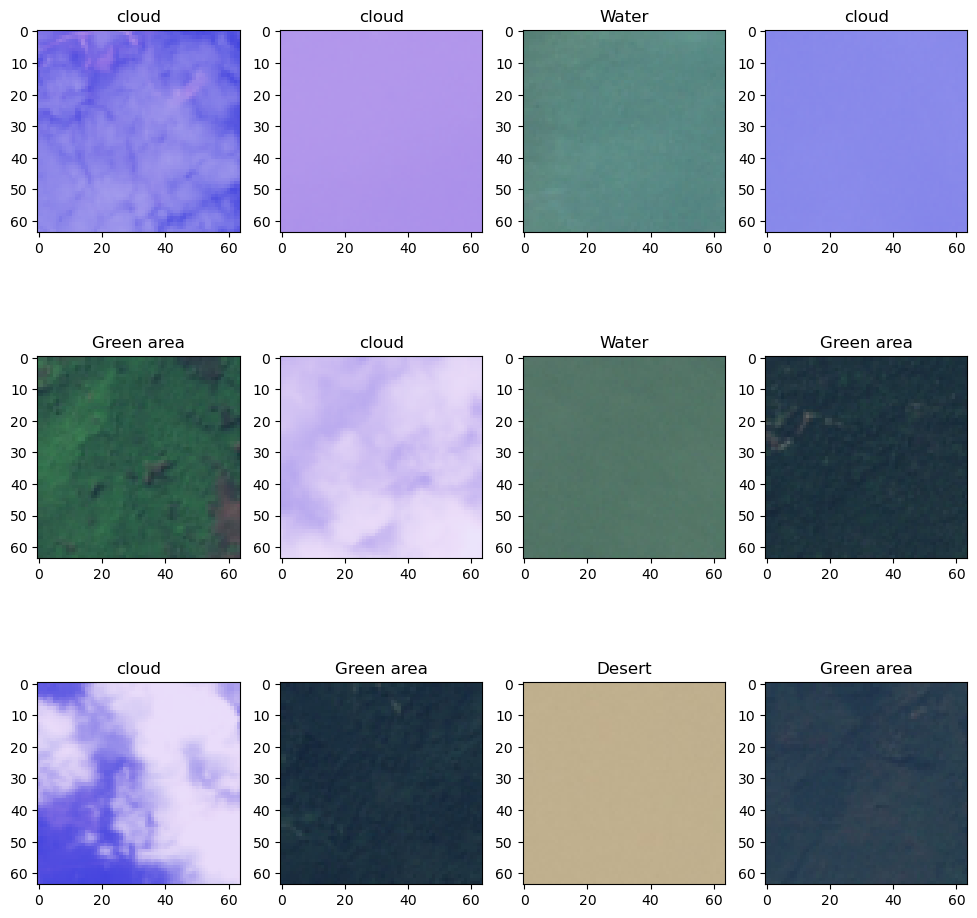

In [27]:
plt.figure(figsize=(12,12))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i])
    if y_pred[i]==0:
        plt.title('Water')
    elif y_pred[i]==1:
        plt.title('Green area')
    elif y_pred[i]==2:
        plt.title('Desert')
    elif y_pred[i]==3:
        plt.title('cloud')

Accuracy is : 0.8994082840236687
confusion matrix


<Axes: >

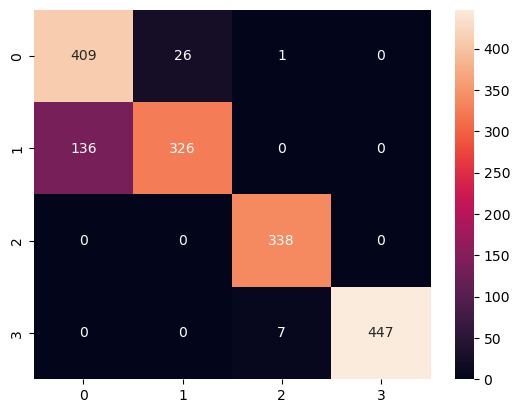

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f"Accuracy is : {accuracy_score(y_test,y_pred)}")
print("confusion matrix")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')